## Task 1. kNN

In [53]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
    
    def _predict(self, x):
        # Вычисляем расстояния между x и всеми точками в обучающем наборе
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        # Находим k ближайших соседей
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Возвращаем наиболее часто встречающийся класс среди k ближайших соседей
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

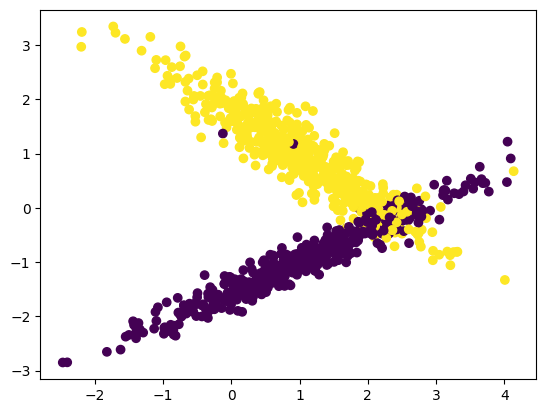

In [57]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Создаем искусственный набор данных из двух классов
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Визуализируем набор данных
#print(np.array([X, y]))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.show()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = KNN(k=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Точность классификации: {:.2f}%".format(accuracy * 100))

Точность классификации: 92.00%


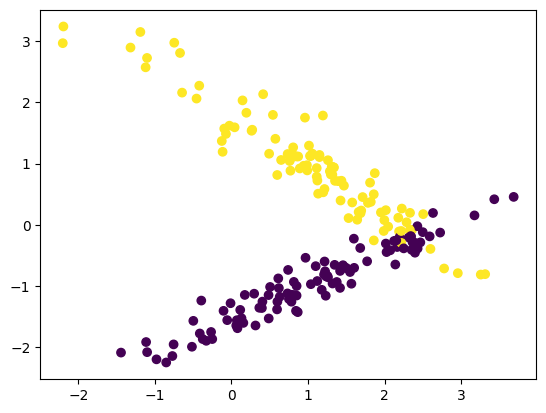

In [59]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
plt.show()

## Task 2. Naive Bayes classifier

In [60]:
import numpy as np

class NaiveBayesClassifier:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)
        
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._prior = np.zeros(n_classes, dtype=np.float64)
        
        for c in self._classes:
            X_c = X[c==y]
            self._mean[c, :] = X_c.mean(axis=0)
            self._var[c, :] = X_c.var(axis=0)
            self._prior[c] = X_c.shape[0] / float(n_samples)
    
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        posteriors = []
        for idx, c in enumerate(self._classes):
            prior = np.log(self._prior[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
        return self._classes[np.argmax(posteriors)]
    
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x-mean)**2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator


In [61]:
X = np.array([
    [6, 180, 12],
    [5.92, 190, 11],
    [5.58, 170, 12],
    [5.92, 165, 10],
    [5, 100, 6],
    [5.5, 150, 8],
    [5.42, 130, 7],
    [5.75, 150, 9],
])

y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

clf = NaiveBayesClassifier()
clf.fit(X, y)

In [63]:
X_test = np.array([[6, 180, 11]])
y_pred = clf.predict(X_test)
y_pred

array([0])